In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer, KNNImputer
knn = KNNImputer(n_neighbors=5)
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [13]:
data_file = "/content/drive/MyDrive/Colab Notebooks/Nispera/data/final_data_360min.csv"
df = pd.read_csv(data_file)

In [14]:
df["environment_wind_direction_absolute_avg"] = knn.fit_transform(df["environment_wind_direction_absolute_avg"].values.reshape(-1,1))
df["nacelle_direction_avg"] = knn.fit_transform(df["nacelle_direction_avg"].values.reshape(-1,1))
df["rotor_blades_pitch_angle_avg"] = knn.fit_transform(df["rotor_blades_pitch_angle_avg"].values.reshape(-1,1))
df_problem_class = df[["problem_class"]]
df.drop(columns = ["ID",	"problem_class",	"datetime"],inplace = True)

MinMaxScaler()


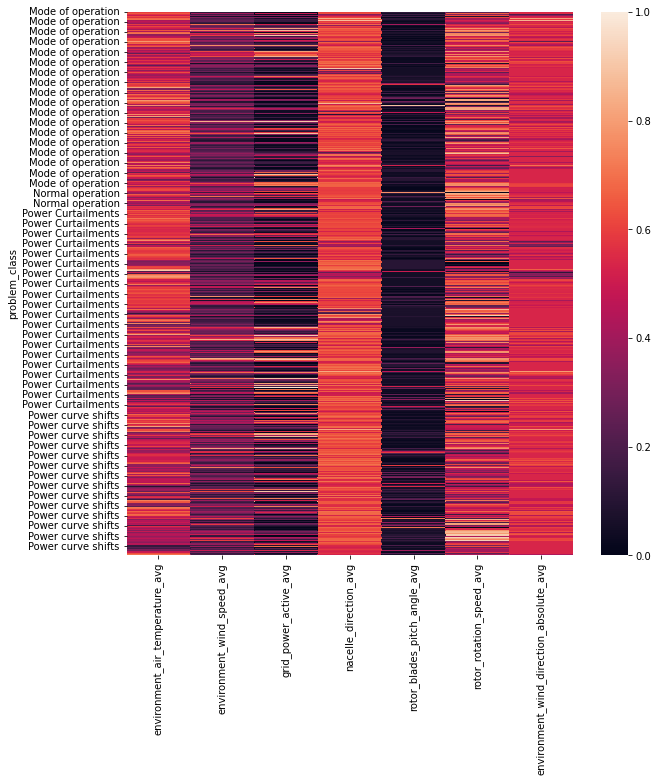

In [27]:
scaler = MinMaxScaler()
print(scaler.fit(df))
df = scaler.transform(df)
df = pd.DataFrame(df)
df.columns = ["environment_air_temperature_avg",	"environment_wind_speed_avg",	"grid_power_active_avg"	,"nacelle_direction_avg",	"rotor_blades_pitch_angle_avg",	"rotor_rotation_speed_avg",	"environment_wind_direction_absolute_avg"]
df["problem_class"] = df_problem_class
df = df.sort_values(by = ["problem_class"])
df.set_index("problem_class", inplace = True)
fig, ax = plt.subplots(figsize=(10, 10)) # setting up the empty plot to use next

# Assembly of the heatmap:
h = sns.heatmap(df)
